<a href="https://colab.research.google.com/github/Pranov1984/Digit-Recognition-in-photographs/blob/master/Digit_Recognition_SVNH_CNN_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import the data

In [ ]:
# Import the data
import h5py
import numpy as np

ds=h5py.File('/content/drive/My Drive/Colab Notebooks/AIML/ANN/Project SVNH - NN & DL/SVHN_single_grey1.h5','r')

X_train = ds['X_train'][:]
y_train = ds['y_train'][:]
X_test = ds['X_test'][:]
y_test = ds['y_test'][:]

# Close this file
ds.close()

In [ ]:
X_train[0]

array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

In [ ]:
X_train.max(), X_train.min(), X_test.max(), X_test.min()

(254.9745, 0.0, 254.9745, 0.0)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, X_test.shape

((42000, 32, 32), (42000,), (18000, 32, 32), (18000, 32, 32))

### Check out the unique values of the dependent variables and counts of unique each label

In [ ]:
import numpy as np

(unique, counts) = np.unique(y_train, return_counts=True)

unique, counts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([4186, 4172, 4197, 4281, 4188, 4232, 4168, 4192, 4188, 4196]))

2


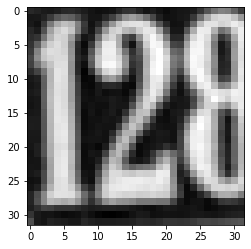

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

print(y_train[0])
plt.imshow(X_train[0], cmap='gray')

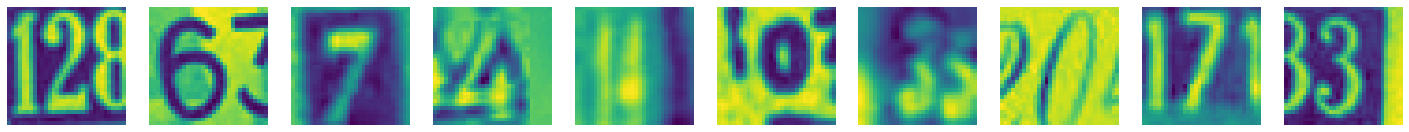

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
plt.figure(figsize=(25,15))
col=10
rows=1
for i in range(10):
  plt.subplot(rows,col,i+1)
  plt.imshow(X_train[i])
  plt.axis('off')
plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))

# For being able to train a CNN model, we need to reshape the data to keras acceptable format i.e., make it 4d with addition of channel

In [ ]:
train_X = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
test_X = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)

In [ ]:
# One Hot encode the target variable
from keras.utils import to_categorical

train_y = to_categorical(y_train, 10)
test_y  = to_categorical(y_test, 10)

In [ ]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((42000, 32, 32, 1), (42000, 10), (18000, 32, 32, 1), (18000, 10))

## Create validation data for testing the model

In [ ]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size = 0.1, random_state =1, stratify = train_y)

In [ ]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape, val_X.shape, val_y.shape

((37800, 32, 32, 1),
 (37800, 10),
 (18000, 32, 32, 1),
 (18000, 10),
 (4200, 32, 32, 1),
 (4200, 10))

### Preprocessing the data i.e. normalizing the data

In [ ]:
train_X = train_X/255.0
test_X = test_X/255.0
val_X = val_X/255.0

## Model BUilding

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization, Conv2D, Flatten, MaxPool2D
from keras import  optimizers

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), input_shape=(32,32,1), activation='relu', kernel_initializer='he_normal', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(32, kernel_size=(3,3), input_shape=(32,32,1), activation='relu', kernel_initializer='he_normal', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 64)        640       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 32)        18464     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 2048)             

In [ ]:
opt= optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_X, train_y, epochs=50,batch_size=512 ,validation_data=(test_X, test_y))

Epoch 1/50
74/74 [==============================] - 1s 13ms/step - loss: 2.5946 - accuracy: 0.0987 - val_loss: 2.3029 - val_accuracy: 0.0956
Epoch 2/50
74/74 [==============================] - 1s 11ms/step - loss: 2.3029 - accuracy: 0.1013 - val_loss: 2.3029 - val_accuracy: 0.0982
Epoch 3/50
74/74 [==============================] - 1s 11ms/step - loss: 2.3029 - accuracy: 0.0992 - val_loss: 2.3030 - val_accuracy: 0.0982
Epoch 4/50
74/74 [==============================] - 1s 11ms/step - loss: 2.3029 - accuracy: 0.0970 - val_loss: 2.3029 - val_accuracy: 0.0982
Epoch 5/50
74/74 [==============================] - 1s 11ms/step - loss: 2.3030 - accuracy: 0.0981 - val_loss: 2.3029 - val_accuracy: 0.1016
Epoch 6/50
74/74 [==============================] - 1s 11ms/step - loss: 2.3029 - accuracy: 0.0951 - val_loss: 2.3028 - val_accuracy: 0.0955
Epoch 7/50
74/74 [==============================] - 1s 11ms/step - loss: 2.3028 - accuracy: 0.0996 - val_loss: 2.3029 - val_accuracy: 0.1002
Epoch 8/50
74

In [ ]:
results = model.evaluate(val_X, val_y)

132/132 [==============================] - 0s 2ms/step - loss: 2.3028 - accuracy: 0.1019


## Introduce early stop criteria and model checpoint

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), input_shape=(32,32,1), activation='relu', kernel_initializer='he_normal', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dropout(0.1))

model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.1))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 64)        640       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 8, 8, 32)         

## Initializing the Tensorboard callback for visualization of training

In [ ]:
#Import tensorboard callback which will passed in model.fit function.
from keras.callbacks import TensorBoard
from time import time


#Setting the directory to store the logs.
tensorboard = TensorBoard(log_dir=".logs/{}".format(time()))

from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('svnh_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [ ]:
opt= optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_y, epochs=50,batch_size=512 ,validation_data=(test_X, test_y), callbacks=[tensorboard,early_stopping, model_checkpoint])

Epoch 1/50
73/74 [============================>.] - ETA: 0s - loss: 2.8046 - accuracy: 0.1019
Epoch 00001: val_loss improved from inf to 2.32441, saving model to svnh_cnn_checkpoint_01_loss2.3244.h5
74/74 [==============================] - 1s 17ms/step - loss: 2.8037 - accuracy: 0.1019 - val_loss: 2.3244 - val_accuracy: 0.1057
Epoch 2/50
71/74 [===========================>..] - ETA: 0s - loss: 2.6158 - accuracy: 0.1073
Epoch 00002: val_loss improved from 2.32441 to 2.30017, saving model to svnh_cnn_checkpoint_02_loss2.3002.h5
74/74 [==============================] - 1s 13ms/step - loss: 2.6136 - accuracy: 0.1075 - val_loss: 2.3002 - val_accuracy: 0.1213
Epoch 3/50
70/74 [===========================>..] - ETA: 0s - loss: 2.5282 - accuracy: 0.1113
Epoch 00003: val_loss improved from 2.30017 to 2.27648, saving model to svnh_cnn_checkpoint_03_loss2.2765.h5
74/74 [==============================] - 1s 14ms/step - loss: 2.5265 - accuracy: 0.1113 - val_loss: 2.2765 - val_accuracy: 0.1363
Epoch

In [ ]:
results = model.evaluate(val_X, val_y)

132/132 [==============================] - 0s 3ms/step - loss: 0.3511 - accuracy: 0.8917


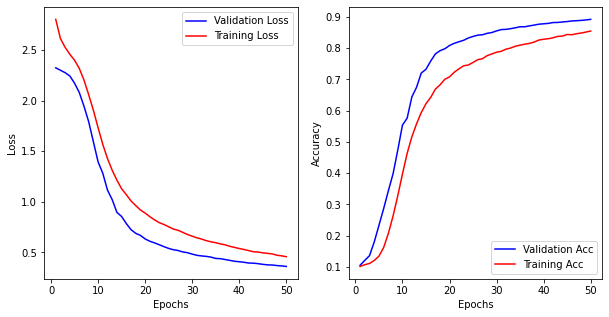

In [ ]:
model_val_loss = history.history['val_loss']
model_train_loss = history.history['loss']
model_val_acc = history.history['val_accuracy']
model_train_acc = history.history['accuracy']


epochs = range(1,51)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, model_val_loss, 'b', label='Validation Loss')
plt.plot(epochs, model_train_loss, 'r', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, model_val_acc, 'b', label='Validation Acc')
plt.plot(epochs, model_train_acc, 'r', label='Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Much improved performance . Increase the kernel size of the first layer and increase the learning rate and compare

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(5,5), input_shape=(32,32,1), activation='relu', kernel_initializer='he_normal', padding='same'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.1))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dropout(0.1))

model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.1))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 64)        1664      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 5, 5, 32)         

In [ ]:
opt= optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_X, train_y, epochs=50,batch_size=1024 ,validation_data=(test_X, test_y), callbacks=[tensorboard,early_stopping, model_checkpoint])

Epoch 1/50
37/37 [==============================] - ETA: 0s - loss: 2.5897 - accuracy: 0.1030
Epoch 00001: val_loss did not improve from 0.36043
37/37 [==============================] - 1s 25ms/step - loss: 2.5897 - accuracy: 0.1030 - val_loss: 2.2823 - val_accuracy: 0.1323
Epoch 2/50
37/37 [==============================] - ETA: 0s - loss: 2.0855 - accuracy: 0.2527
Epoch 00002: val_loss did not improve from 0.36043
37/37 [==============================] - 1s 18ms/step - loss: 2.0855 - accuracy: 0.2527 - val_loss: 1.9681 - val_accuracy: 0.4135
Epoch 3/50
37/37 [==============================] - ETA: 0s - loss: 1.3672 - accuracy: 0.5296
Epoch 00003: val_loss did not improve from 0.36043
37/37 [==============================] - 1s 18ms/step - loss: 1.3672 - accuracy: 0.5296 - val_loss: 1.5167 - val_accuracy: 0.6442
Epoch 4/50
37/37 [==============================] - ETA: 0s - loss: 0.9801 - accuracy: 0.6714
Epoch 00004: val_loss did not improve from 0.36043
37/37 [=======================

In [ ]:
results = model.evaluate(val_X, val_y)

132/132 [==============================] - 0s 3ms/step - loss: 0.2484 - accuracy: 0.9286


## We see Improved performance

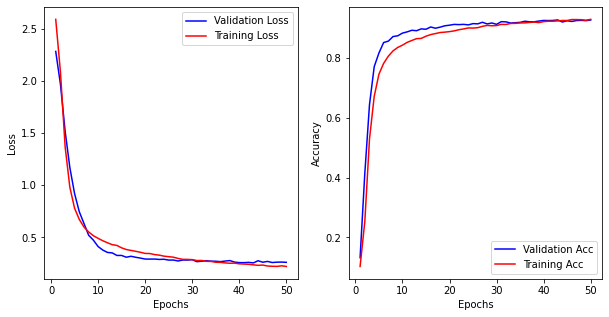

In [ ]:
model_val_loss = history.history['val_loss']
model_train_loss = history.history['loss']
model_val_acc = history.history['val_accuracy']
model_train_acc = history.history['accuracy']


epochs = range(1,51)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, model_val_loss, 'b', label='Validation Loss')
plt.plot(epochs, model_train_loss, 'r', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, model_val_acc, 'b', label='Validation Acc')
plt.plot(epochs, model_train_acc, 'r', label='Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Replace Relu with leaky relu and compare performance

In [ ]:
from keras.layers import LeakyReLU

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(5,5), input_shape=(32,32,1), kernel_initializer='he_normal', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.1))

model.add(Conv2D(64, kernel_size=(3,3), kernel_initializer='he_normal', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(32, kernel_size=(3,3), kernel_initializer='he_normal', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dropout(0.1))

model.add(Dense(512, kernel_initializer='he_normal'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(128, kernel_initializer='he_normal'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.1))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 32, 32, 64)        1664      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_46 (Dropout)         (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 10, 10, 64)        0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 5, 5, 64)        

In [ ]:
opt= optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_X, train_y, epochs=50,batch_size=1024 ,validation_data=(test_X, test_y), callbacks=[tensorboard,early_stopping, model_checkpoint])

Epoch 1/50
37/37 [==============================] - ETA: 0s - loss: 2.6874 - accuracy: 0.1020
Epoch 00001: val_loss did not improve from 0.25505
37/37 [==============================] - 1s 30ms/step - loss: 2.6874 - accuracy: 0.1020 - val_loss: 2.4646 - val_accuracy: 0.1033
Epoch 2/50
37/37 [==============================] - ETA: 0s - loss: 2.4018 - accuracy: 0.1088
Epoch 00002: val_loss did not improve from 0.25505
37/37 [==============================] - 1s 22ms/step - loss: 2.4018 - accuracy: 0.1088 - val_loss: 2.2595 - val_accuracy: 0.1808
Epoch 3/50
37/37 [==============================] - ETA: 0s - loss: 1.9350 - accuracy: 0.3091
Epoch 00003: val_loss did not improve from 0.25505
37/37 [==============================] - 1s 22ms/step - loss: 1.9350 - accuracy: 0.3091 - val_loss: 1.8020 - val_accuracy: 0.4525
Epoch 4/50
37/37 [==============================] - ETA: 0s - loss: 1.1776 - accuracy: 0.6062
Epoch 00004: val_loss did not improve from 0.25505
37/37 [=======================

In [ ]:
results = model.evaluate(val_X, val_y)

132/132 [==============================] - 0s 3ms/step - loss: 0.2659 - accuracy: 0.9212


## No noticeable difference with introduction of leaky relu.
### Introduce some noise during training and compare the performance

This is to introduce regularization in the training to prevent overfitting.

Regularization can be done by addition of noise to training data.
Noise Regularization in Keras Keras supports the addition of noise to models via the GaussianNoise layer.

This is a layer that will add noise to inputs of a given shape. The noise has a mean of zero and requires that a standard deviation of the noise be specified as a parameter

In [ ]:
from keras.layers import GaussianNoise

In [ ]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('svnh_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(5,5), input_shape=(32,32,1), activation='relu', kernel_initializer='he_normal', padding='same'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.1))
model.add(GaussianNoise(0.1))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(GaussianNoise(0.1))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(GaussianNoise(0.1))

model.add(Flatten())
model.add(Dropout(0.1))

model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(GaussianNoise(0.1))

model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.1))
model.add(GaussianNoise(0.1))

model.add(Dense(10, activation='softmax'))

opt= optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_y, epochs=50,batch_size=1024 ,validation_data=(test_X, test_y), callbacks=[tensorboard,early_stopping, model_checkpoint])

Epoch 1/50
35/37 [===========================>..] - ETA: 0s - loss: 2.6111 - accuracy: 0.1040
Epoch 00001: val_loss did not improve from 0.73919
37/37 [==============================] - 1s 28ms/step - loss: 2.6044 - accuracy: 0.1043 - val_loss: 2.3477 - val_accuracy: 0.1045
Epoch 2/50
34/37 [==========================>...] - ETA: 0s - loss: 2.4293 - accuracy: 0.1038
Epoch 00002: val_loss did not improve from 0.73919
37/37 [==============================] - 1s 19ms/step - loss: 2.4258 - accuracy: 0.1048 - val_loss: 2.3013 - val_accuracy: 0.1177
Epoch 3/50
37/37 [==============================] - ETA: 0s - loss: 2.3589 - accuracy: 0.1165
Epoch 00003: val_loss did not improve from 0.73919
37/37 [==============================] - 1s 19ms/step - loss: 2.3589 - accuracy: 0.1165 - val_loss: 2.2535 - val_accuracy: 0.1603
Epoch 4/50
37/37 [==============================] - ETA: 0s - loss: 2.2090 - accuracy: 0.1873
Epoch 00004: val_loss did not improve from 0.73919
37/37 [=======================

In [ ]:
results = model.evaluate(val_X, val_y)

132/132 [==============================] - 0s 3ms/step - loss: 0.2763 - accuracy: 0.9176


## Almost similar accuracy achieved even with introduction of noise. This is a more stable model.

#### Let's now use data augmentation with and regularize more and compare results

https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Augmentation
train_datagen = ImageDataGenerator(rotation_range=3,  # randomly rotate images in the range (degrees, 0 to 180)
                                   width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                                   zoom_range=0.05,  # randomly zoom into images
                                   horizontal_flip=True)  # horizontal flip
                                   #brightness_range=[0.2,0.8])  # brightness

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(5,5), input_shape=(32,32,1), activation='relu', kernel_initializer='he_normal', padding='same'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.1))
model.add(GaussianNoise(0.1))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(GaussianNoise(0.1))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(GaussianNoise(0.1))

model.add(Flatten())
model.add(Dropout(0.1))

model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(GaussianNoise(0.1))

model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.1))
model.add(GaussianNoise(0.1))

model.add(Dense(10, activation='softmax'))

opt= optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Epochs
epochs = 50
# Batch size
batch_size = 512


history = model.fit(train_datagen.flow(train_X,train_y,
                                       batch_size=batch_size, 
                                       seed=27,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=train_X.shape[0] // batch_size,
                    validation_data=(test_X,test_y),
                    verbose=1, callbacks=[tensorboard,early_stopping, model_checkpoint])

Epoch 1/50
 1/73 [..............................] - ETA: 0s - loss: 3.1349 - accuracy: 0.0957WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
73/73 [==============================] - ETA: 0s - loss: 2.5803 - accuracy: 0.1018
Epoch 00001: val_loss improved from inf to 2.32195, saving model to svnh_cnn_checkpoint_01_loss2.3220.h5
73/73 [==============================] - 9s 126ms/step - loss: 2.5803 - accuracy: 0.1018 - val_loss: 2.3220 - val_accuracy: 0.0942
Epoch 2/50
73/73 [==============================] - ETA: 0s - loss: 2.4000 - accuracy: 0.1026
Epoch 00002: val_loss did not improve from 2.32195
73/73 [==============================] - 9s 123ms/step - loss: 2.4000 - accuracy: 0.1026 - val_loss: 2.3423 - val_accuracy: 0.0993
Epoch 3/50
73/73 [================

In [ ]:
result= model.evaluate(val_X, val_y)

132/132 [==============================] - 0s 3ms/step - loss: 0.3583 - accuracy: 0.8843


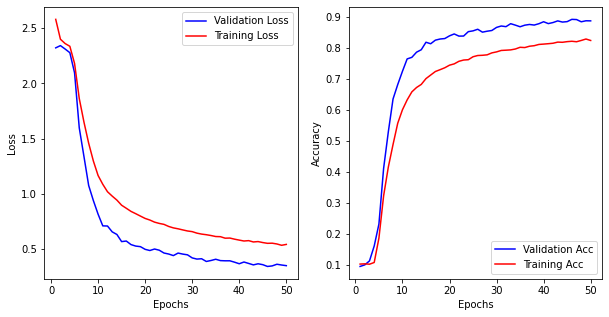

In [ ]:
model_val_loss = history.history['val_loss']
model_train_loss = history.history['loss']
model_val_acc = history.history['val_accuracy']
model_train_acc = history.history['accuracy']


epochs = range(1,51)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, model_val_loss, 'b', label='Validation Loss')
plt.plot(epochs, model_train_loss, 'r', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, model_val_acc, 'b', label='Validation Acc')
plt.plot(epochs, model_train_acc, 'r', label='Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
# Epochs
epochs = 50
# Batch size
batch_size = 512


history = model.fit(train_datagen.flow(train_X,train_y,
                                       batch_size=batch_size, 
                                       seed=27,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=train_X.shape[0] // batch_size,
                    validation_data=(test_X,test_y),
                    verbose=1, callbacks=[tensorboard,early_stopping, model_checkpoint])

Epoch 1/50
73/73 [==============================] - ETA: 0s - loss: 0.5322 - accuracy: 0.8276
Epoch 00001: val_loss did not improve from 0.33997
73/73 [==============================] - 9s 125ms/step - loss: 0.5322 - accuracy: 0.8276 - val_loss: 0.3415 - val_accuracy: 0.8903
Epoch 2/50
73/73 [==============================] - ETA: 0s - loss: 0.5306 - accuracy: 0.8296
Epoch 00002: val_loss improved from 0.33997 to 0.33955, saving model to svnh_cnn_checkpoint_02_loss0.3395.h5
73/73 [==============================] - 9s 124ms/step - loss: 0.5306 - accuracy: 0.8296 - val_loss: 0.3395 - val_accuracy: 0.8914
Epoch 3/50
73/73 [==============================] - ETA: 0s - loss: 0.5188 - accuracy: 0.8324
Epoch 00003: val_loss did not improve from 0.33955
73/73 [==============================] - 9s 125ms/step - loss: 0.5188 - accuracy: 0.8324 - val_loss: 0.3398 - val_accuracy: 0.8929
Epoch 4/50
73/73 [==============================] - ETA: 0s - loss: 0.5240 - accuracy: 0.8313
Epoch 00004: val_los

In [ ]:
results = model.evaluate(val_X, val_y)

132/132 [==============================] - 0s 3ms/step - loss: 0.2981 - accuracy: 0.9064


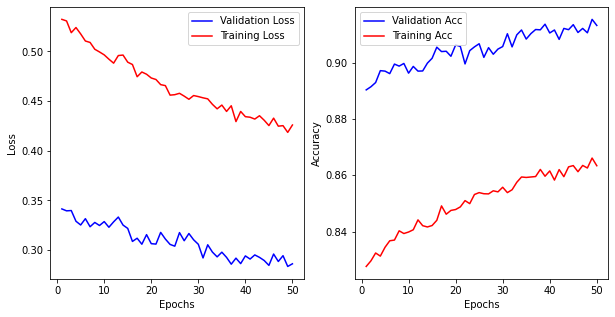

In [ ]:
model_val_loss = history.history['val_loss']
model_train_loss = history.history['loss']
model_val_acc = history.history['val_accuracy']
model_train_acc = history.history['accuracy']


epochs = range(1,51)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, model_val_loss, 'b', label='Validation Loss')
plt.plot(epochs, model_train_loss, 'r', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, model_val_acc, 'b', label='Validation Acc')
plt.plot(epochs, model_train_acc, 'r', label='Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

### Vizualizing Test Predictions

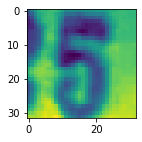

Actual Digit is:  5


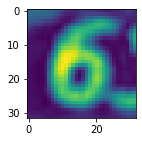

Actual Digit is:  6


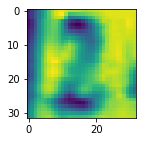

Actual Digit is:  2


In [ ]:
import numpy as np

plt.figure(figsize=(2,2))
plt.imshow(X_test[50])
plt.show()
print( "Actual Digit is: ",np.argmax(model.predict(test_X)[50]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[500])
plt.show()
print( "Actual Digit is: ",np.argmax(model.predict(test_X)[500]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[1500])
plt.show()
print( "Actual Digit is: ",np.argmax(model.predict(test_X)[1500]))
#print(np.argmax(model.predict(X_test[3].reshape(784,1))))

## Save the model to be able to upload the weights later and predict

In [ ]:
#Set the path where you want to store the model and weights. 
model.save('/content/drive/My Drive/Colab Notebooks/AIML/ANN/CNN_svnh.h5')
model.save_weights('/content/drive/My Drive/Colab Notebooks/AIML/ANN/CNN_svnh_weights.h5')

## Load the model and the weights

In [ ]:
from tensorflow import keras
model1 = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/AIML/ANN/CNN_svnh.h5')
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 10, 64)        0         
_________________________________________________________________
gaussian_noise (GaussianNois (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0

In [ ]:
#The pre-trained weights must exist in the current folder
model1.load_weights('/content/drive/My Drive/Colab Notebooks/AIML/ANN/CNN_svnh_weights.h5')

In [ ]:
opt= optimizers.Adam(learning_rate=0.001)
model1.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model1.evaluate(val_X,val_y)

132/132 [==============================] - 0s 3ms/step - loss: 0.2981 - accuracy: 0.9064


[0.298083633184433, 0.9064285755157471]

## Visualize predictions

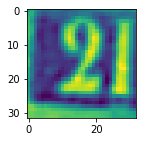

Actual Digit is:  2


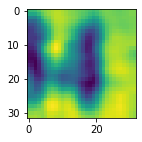

Actual Digit is:  4


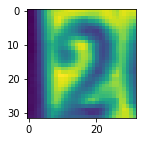

Actual Digit is:  2


In [ ]:
import numpy as np

plt.figure(figsize=(2,2))
plt.imshow(X_test[25])
plt.show()
print( "Actual Digit is: ",np.argmax(model1.predict(test_X)[25]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[105])
plt.show()
print( "Actual Digit is: ",np.argmax(model1.predict(test_X)[105]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[1010])
plt.show()
print( "Actual Digit is: ",np.argmax(model1.predict(test_X)[1010]))

## Calculate the model performance metrics on both test and val data sets

In [ ]:
results = model1.predict(test_X)
results = np.argmax(results,axis = 1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(results, y_test))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1926
           1       0.92      0.90      0.91      1877
           2       0.93      0.92      0.92      1825
           3       0.88      0.86      0.87      1760
           4       0.94      0.94      0.94      1812
           5       0.89      0.91      0.90      1716
           6       0.89      0.91      0.90      1790
           7       0.92      0.95      0.94      1758
           8       0.90      0.92      0.91      1779
           9       0.91      0.93      0.92      1757

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



In [ ]:
y_val = np.argmax(val_y,axis = 1)
y_val[11]

3

In [ ]:
results = model1.predict(val_X)
results = np.argmax(results,axis = 1)
print(classification_report(results, y_val))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       428
           1       0.93      0.89      0.91       436
           2       0.94      0.91      0.92       432
           3       0.89      0.86      0.87       440
           4       0.93      0.94      0.94       417
           5       0.87      0.91      0.89       405
           6       0.84      0.91      0.87       384
           7       0.93      0.94      0.93       415
           8       0.88      0.89      0.88       413
           9       0.93      0.90      0.92       430

    accuracy                           0.91      4200
   macro avg       0.91      0.91      0.91      4200
weighted avg       0.91      0.91      0.91      4200

